In [3]:
f=open("c:/data/text/trumph.txt","r")
lines=f.readlines()
f.close()
print(lines[0][:500])

 Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans and people of the world, thank you. We, the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years we gather on these 


In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer=RegexpTokenizer('[\w]+')
stop_words=stopwords.words('english')
words=lines[0].lower()
tokens=tokenizer.tokenize(words)
stopped_tokens=[i for i in list(tokens) if not i in stop_words]
stopped_tokens2=[i for i in stopped_tokens if len(i)>1]

Counter({'america': 20, 'american': 11, 'people': 10, 'country': 9, 'one': 8, 'every': 7, 'nation': 7, 'world': 6, 'great': 6, 'back': 6, 'never': 6, 'new': 6, 'president': 5, 'many': 5, 'today': 5, 'protected': 5, 'across': 5, 'right': 5, 'dreams': 5, 'god': 5, 'make': 5, 'americans': 4, 'thank': 4, 'citizens': 4, 'together': 4, 'power': 4, 'first': 4, 'wealth': 4, 'everyone': 4, 'day': 4, 'heart': 4, 'bring': 4, 'obama': 3, 'government': 3, 'jobs': 3, 'left': 3, 'factories': 3, 'families': 3, 'united': 3, 'whether': 3, 'millions': 3, 'foreign': 3, 'countries': 3, 'nations': 3, 'borders': 3, 'must': 3, 'bless': 3, 'national': 2, 'years': 2, 'face': 2, 'get': 2, 'done': 2, 'transferring': 2, 'another': 2, 'washington': 2, 'long': 2, 'share': 2, 'politicians': 2, 'victories': 2, 'triumphs': 2, 'capital': 2, 'land': 2, 'moment': 2, 'states': 2, 'truly': 2, 'forgotten': 2, 'men': 2, 'women': 2, 'longer': 2, 'movement': 2, 'exists': 2, 'children': 2, 'safe': 2, 'good': 2, 'righteous': 2, '

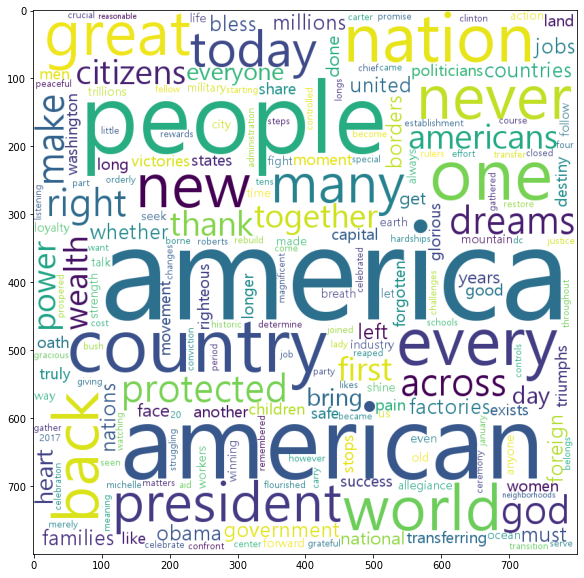

In [5]:
import pandas as pd
pd.Series(stopped_tokens2).value_counts().head(10)
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

wordcloud=WordCloud(
    font_path="c:/windows/fonts/malgun.ttf",
    width=800,
    height=800,
    background_color="white"
)
count=Counter(stopped_tokens2)
print(count)
wordcloud=wordcloud.generate_from_frequencies(count)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()

In [8]:
f=open("c:/data/text/news1.txt","r",encoding='utf-8')
lines=f.readlines()
f.close()

In [9]:
from konlpy.tag import Hannanum
han=Hannanum()
temp=[]
for i in range(len(lines)):
    a=lines[i].strip()
    temp.append(han.nouns(a))

def flatten(items):
    flatList=[]
    for elem in items:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList
word_list=flatten(temp)
word_list=pd.Series([x for x in word_list if len(x)>1])

In [10]:
word_list.value_counts().head(10)

포트리스    42
게임      35
레티아드    11
버전       9
개발       8
기존       8
스팀       8
계획       7
아레나      7
관련       6
dtype: int64

In [11]:
stopwords=['전날','오전']
word_list2=[i for i in word_list if i not in stopwords]

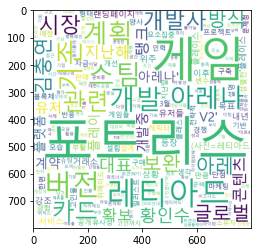

In [14]:
from collections import Counter
from wordcloud import WordCloud
wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf',
 width=800,height=800,background_color='white')

import matplotlib.pyplot as plt

count=Counter(word_list2)
wordcloud=wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()